In [1]:
import matplotlib
import pandas as pd
import seaborn as sbn

In [2]:
%matplotlib inline

In [3]:
recipes_data_df = pd.read_csv('out/recipes_data.csv')

In [4]:
recipes_ml_df = pd.read_csv('out/recipes_ml.csv')

In [5]:
X = recipes_ml_df
y = recipes_data_df.year

In [6]:
recipes_df = pd.concat([recipes_data_df, recipes_ml_df], axis=1)

In [7]:
mean_by_year_df = recipes_df.groupby('year').mean()

In [8]:
num_cols = ['num_ingredients', 'num_techniques', 'num_preparations']
mean_num_ingrs_techs_preps_by_year_df = mean_by_year_df[num_cols]

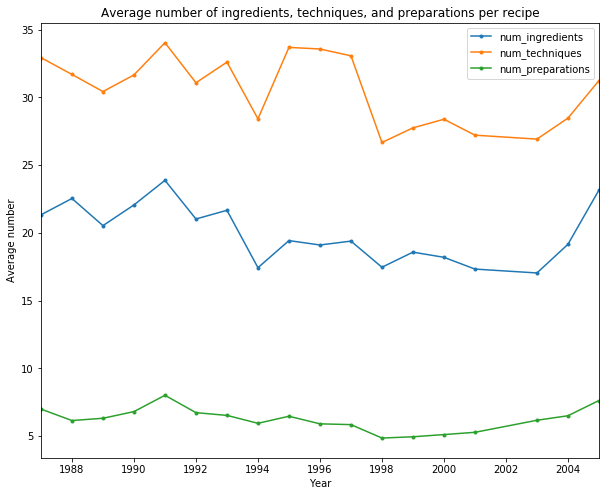

In [9]:
ax = mean_num_ingrs_techs_preps_by_year_df.plot(
    figsize=(10, 8),
    title = 'Average number of ingredients, techniques, and preparations per recipe',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Average number');

Conclusions:<br>
There are peaks in 1991, 1995-97, and 2005. Therefore, these metrics do not explain the creativity increase on their own.

In [10]:
ingr_cols = [c for c in mean_by_year_df if str(c).startswith('i_')]
mean_ingredients_by_year_df = mean_by_year_df[ingr_cols]

In [11]:
TOP = 1
THRESHOLD = 0.0
top_ingredients = []
for i, row in mean_ingredients_by_year_df.iterrows():
    top_ingrs = row.sort_values(ascending=False).head(TOP).index
    sel_ingrs = (ingr for ingr in top_ingrs if row[ingr] >= THRESHOLD)
    top_ingredients.extend(sel_ingrs)
top_ingredients = list(set(top_ingredients))

In [12]:
mean_top_ingredients_by_year_df = mean_ingredients_by_year_df[top_ingredients] * 100

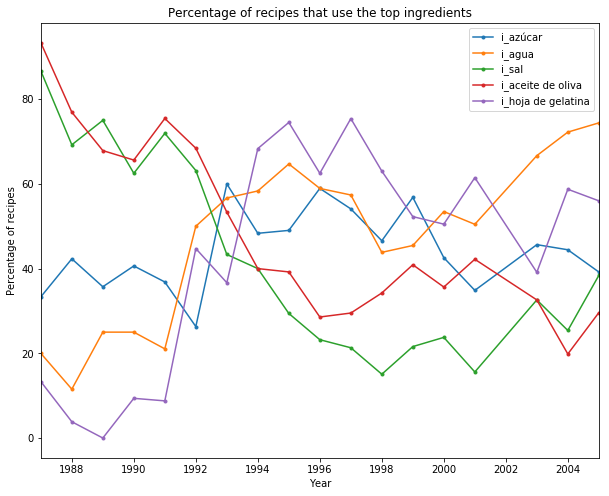

In [13]:
ax = mean_top_ingredients_by_year_df.plot(
    figsize=(10, 8),
    title = 'Percentage of recipes that use the top ingredients',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of recipes');

Conclusions:<br>
Description of the graphics.

In [36]:
important_ingredients = [
    'i_agar',
    'i_azúcar',
    'i_hoja de gelatina',
    'i_agua',
    'i_sal',
    'i_perifollo',
    'i_agar-agar en polvo',
    'i_sal maldon',
    'i_nata líquida',
    'i_aceite de oliva',
]
important_ingredients = list(set(important_ingredients) - set(top_ingredients))

In [38]:
mean_imp_ingredients_by_year_df = mean_ingredients_by_year_df[important_ingredients] * 100

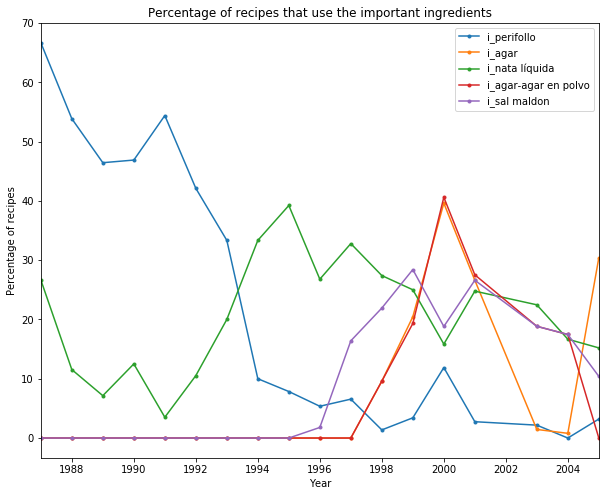

In [39]:
ax = mean_imp_ingredients_by_year_df.plot(
    figsize=(10, 8),
    title = 'Percentage of recipes that use the important ingredients',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of recipes');

Conclusions:<br>
Description of the graphics.

In [14]:
tech_cols = [c for c in mean_by_year_df if str(c).startswith('t_')]
mean_techniques_by_year_df = mean_by_year_df[tech_cols]

In [19]:
mean_techniques_by_year_df

,t_espolvorear,t_perforar,t_encajar,t_caer,t_intercalar,t_al vapor,t_servir,t_presentar,t_inyectar,t_cocer,...,t_embeber,t_azucarar,t_pellizcar,t_nitrógeno líquido,t_tapar,t_conservar,t_salir,t_acabar,t_colar,t_triturado
year,,,,,,,,,,,,,,,,,,,,,
1987,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.533333,...,0.000000,0.000000,0.000000,0.000000,0.133333,0.066667,0.000000,0.133333,0.466667,0.000000
1988,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.192308,0.076923,0.000000,0.730769,...,0.000000,0.000000,0.000000,0.000000,0.038462,0.076923,0.000000,0.000000,0.384615,0.000000
1989,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.178571,0.071429,0.000000,0.714286,...,0.000000,0.000000,0.000000,0.000000,0.214286,0.035714,0.035714,0.107143,0.357143,0.000000
1990,0.062500,0.000000,0.000000,0.000000,0.031250,0.000000,0.125000,0.000000,0.000000,0.843750,...,0.000000,0.000000,0.000000,0.000000,0.187500,0.031250,0.000000,0.156250,0.312500,0.000000
1991,0.052632,0.000000,0.017544,0.017544,0.070175,0.000000,0.140351,0.000000,0.000000,0.771930,...,0.000000,0.000000,0.000000,0.000000,0.087719,0.035088,0.017544,0.087719,0.298246,0.000000
1992,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.078947,0.000000,0.000000,0.552632,...,0.000000,0.000000,0.000000,0.000000,0.131579,0.052632,0.026316,0.052632,0.552632,0.000000
1993,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.066667,0.000000,0.866667,...,0.000000,0.000000,0.000000,0.000000,0.133333,0.033333,0.000000,0.033333,0.466667,0.000000
1994,0.083333,0.000000,0.000000,0.000000,0.016667,0.000000,0.216667,0.016667,0.000000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.300000,0.016667,0.100000,0.350000,0.500000,0.000000
1995,0.098039,0.000000,0.000000,0.000000,0.039216,0.019608,0.137255,0.019608,0.000000,0.705882,...,0.000000,0.000000,0.000000,0.000000,0.274510,0.039216,0.058824,0.352941,0.686275,0.000000


In [ ]:
MAX 1 para cada ingr y tech

In [15]:
TOP = 2
THRESHOLD = 0.95
top_techniques = []
for i, row in mean_techniques_by_year_df.iterrows():
    top_techs = row.sort_values(ascending=False).head(TOP).index
    sel_techs = (tech for tech in top_techs if row[tech] >= THRESHOLD)
    top_techniques.extend(sel_techs)
top_techniques = list(set(top_techniques))

In [18]:
mean_top_techniques_by_year_df

,t_horno,t_agua,t_guardar
year,,,
1987,200.000000,153.333333,100.000000
1988,253.846154,142.307692,84.615385
1989,192.857143,135.714286,78.571429
1990,178.125000,146.875000,78.125000
1991,219.298246,149.122807,87.719298
1992,152.631579,144.736842,89.473684
1993,153.333333,150.000000,86.666667
1994,128.333333,113.333333,58.333333
1995,143.137255,107.843137,76.470588


In [16]:
mean_top_techniques_by_year_df = mean_techniques_by_year_df[top_techniques] * 100

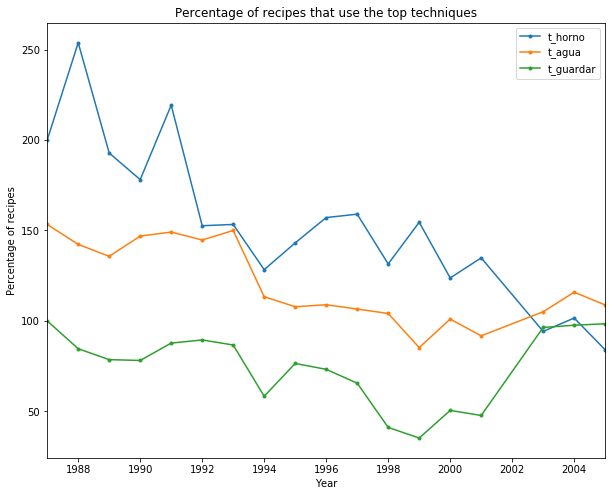

In [17]:
ax = mean_top_techniques_by_year_df.plot(
    figsize=(10, 8),
    title = 'Percentage of recipes that use the top techniques',
    marker='.',
)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of recipes');

Conclusions:<br>
Description of the graphics.